In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, gridspec
from matplotlib.colors import ListedColormap
from matplotlib.transforms import Bbox
from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid

# Some plotting utilities

In [2]:
import matplotlib.colors as mcolors

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

class MidpointSymLogNorm(mcolors.SymLogNorm):
    def __init__(self, linthresh, linscale=None, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mcolors.SymLogNorm.__init__(self, linthresh=linthresh, linscale=linscale, vmin=vmin, vmax=vmax, clip=clip)    
    
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [3]:
Ndots=2**13
stretch_bottom=6.
stretch_top=1/2.5
truncate_bottom=0.35

bottom = cm.get_cmap('BuGn_r', Ndots)
top = cm.get_cmap('RdPu', Ndots)

interp_top=np.linspace(0, 1, Ndots)**stretch_top
interp_bottom=np.linspace(truncate_bottom, 1, Ndots)**stretch_bottom
newcolors = np.vstack((bottom(interp_bottom),
                       top(interp_top)))
GradientMap = ListedColormap(newcolors, name='GradientMap')

In [4]:
Ndots=2**15
stretch_top=0.7
stretch_bottom=0.5
top = cm.get_cmap('BrBG', Ndots)
bottom = cm.get_cmap('BrBG', Ndots)

interp_top=np.linspace(0., 1., Ndots)**stretch_top+0.5
interp_bottom=np.linspace(0., 1., Ndots)**stretch_bottom-0.5
newcolors = np.vstack((bottom(interp_bottom),
                       top(interp_top)))

CovarianceMap = ListedColormap(newcolors, name='CovarianceMap')

In [5]:
top = cm.get_cmap('Reds_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0.7, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
Blues_Reds = ListedColormap(newcolors, name='Blues_Reds')

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Purples', 128)

newcolors = np.vstack((top(np.linspace(0.7, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
Purples_Oranges = ListedColormap(newcolors, name='Purples_Oranges')

In [6]:
nContourLevels=3
def get_contours(Z, nBins, confLevels=(.3173, .0455, .0027)):
    Z /= Z.sum()
    nContourLevels = len(confLevels)
    chainLevels = np.ones(nContourLevels+1)
    histOrdered = np.sort(Z.flat)
    histCumulative = np.cumsum(histOrdered)
    nBinsFlat = np.linspace(0., nBins**2, nBins**2)

    for l in range(nContourLevels):
        # Find location of contour level in 1d histCumulative
        temp = np.interp(confLevels[l], histCumulative, nBinsFlat)
        # Find "height" of contour level
        chainLevels[nContourLevels-1-l] = np.interp(temp, nBinsFlat, histOrdered)
        
    return chainLevels

In [7]:
nBins = 30
nContourLevels = 3
# 2d contour levels: (68%, 95%, 99%)
confLevels = [.3173, .0455, .0027]
confLevels_grid = [-6.18/2,-4.61/2,-2.30/2,0]

smoothingKernel = 1
filledPlots = True
truthColors = np.expand_dims(np.array('black'), axis=0)
truthLineStyles = np.expand_dims(np.array('--'), axis=0)
plotDensity = False
figureWidth = 8

colorsDict = {
              # Match pygtc up to v0.2.4
              'blues_old' : ('#4c72b0','#7fa5e3','#b2d8ff'),
              'greens_old' : ('#55a868','#88db9b','#bbffce'),
              'yellows_old' : ('#f5964f','#ffc982','#fffcb5'),
              'reds_old' : ('#c44e52','#f78185','#ffb4b8'),
              'purples_old' : ('#8172b2','#b4a5e5','#37d8ff'),
              # New color scheme, dark colors match matplotlib v2
              'blues' : ('#1f77b4','#52aae7','#85ddff'),
              'oranges' : ('#ff7f0e','#ffb241','#ffe574'),
              'greens' : ('#2ca02c','#5fd35f','#92ff92'),
              'reds' : ('#d62728','#ff5a5b','#ff8d8e'),
              'purples' : ('#9467bd','#c79af0','#facdff'),
              'browns' : ('#8c564b','#bf897e','#f2bcb1'),
              'pinks' : ('#e377c2','#ffaaf5','#ffddff'),
              'grays' : ('#7f7f7f','#b2b2b2','#e5e5e5'),
              'yellows' : ('#bcbd22','#eff055','#ffff88'),
              'cyans' : ('#17becf','#4af1ff','#7dffff'),
          }
defaultColorsOrder = ['blues', 'oranges','greens', 'reds', 'purples',
                    'browns', 'pinks', 'grays', 'yellows', 'cyans']
colorsOrder = defaultColorsOrder
colors = [colorsDict[cs] for cs in colorsOrder]

In [8]:
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"""\usepackage{amsmath,amsfonts,amssymb,amsthm} \usepackage{upgreek} 
\DeclareFontFamily{OT1}{pzc}{}\DeclareFontShape{OT1}{pzc}{m}{it}{<-> s * [1.10] pzcmi7t}{}
\DeclareMathAlphabet{\mathpzc}{OT1}{pzc}{m}{it}"""})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 17})

# Theory, signal, and data

In [9]:
A=np.load("model.npz", allow_pickle=True)
t=A["t"]; t_s=A["t_s"]; threshold=A["threshold"]; S=A["S"]
Xtheory=A["Xtheory"]; Ytheory=A["Ytheory"]
Xefficiency=A["Xefficiency"]
Xtsignal=A["Xtsignal"]; Ytsignal=A["Ytsignal"]; Dtsignal=A["Dtsignal"]; Otsignal=A["Otsignal"]
Xobs=A["Xobs"]; Yobs=A["Yobs"]
Xdata=A["Xdata"]; Ydata=A["Ydata"]
masks=A["masks"]

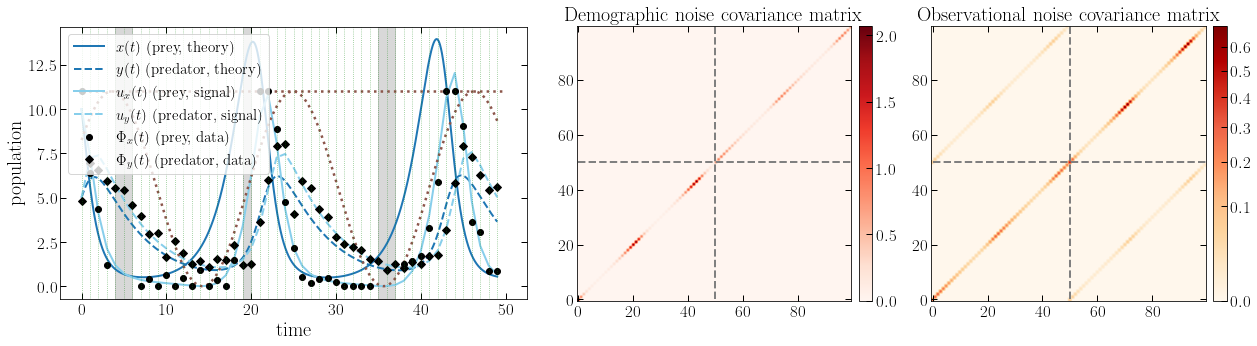

In [10]:
fig = plt.figure(figsize=(18,5))

gs0 = gridspec.GridSpec(1,3, width_ratios=[1.5,0.5,0.5], height_ratios=[1.], wspace=1.)
gs0.update(right=1.,left=0.)
ax0 = plt.subplot(gs0[0])
gs1 = gridspec.GridSpec(1,3)
gs1.update(top=1.,bottom=0.)
ax1 = plt.subplot(gs1[1])
ax2 = plt.subplot(gs1[2])

# Plot the theory, signal, and data
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
ax0.plot(t,Xtheory,ls="-",color="C0",label="$x(t)$ (prey, theory)")
ax0.plot(t,Ytheory,ls="--",color="C0",label="$y(t)$ (predator, theory)")
ax0.plot(t_s,Xtsignal,ls="-",color="skyblue",label="$u_x(t)$ (prey, signal)")
ax0.plot(t_s,Ytsignal,ls="--",color="skyblue",label="$u_y(t)$ (predator, signal)")
ax0.plot(t,Xefficiency,ls=':',lw=2.5,color="C5")
ax0.plot([0,S//2],[threshold,threshold],ls=':',lw=2.5,color="C5")
ax0.plot(Xobs,Xdata,marker="o",ls="",color="black",label="$\Phi_x(t)$ (prey, data)")
ax0.plot(Yobs,Ydata,marker="D",ls="",color="black",label="$\Phi_y(t)$ (predator, data)")
ax0.set_xlabel("time",size=20)
ax0.set_ylabel("population",size=20)
(xmin,xmax)=(xmin_ref,xmax_ref)=ax0.get_xlim()
(ymin,ymax)=(ymin_ref,ymax_ref)=ax0.get_ylim()
ax0.set_xlim([xmin,xmax])
ax0.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.3)
ax0.legend(loc="upper left",fontsize=15)

# Plot the noise covariance matrix
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.xaxis.set_tick_params(which='major', length=6)
ax1.xaxis.set_tick_params(which='minor', length=4)
ax1.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.yaxis.set_tick_params(which='major', length=6)
ax1.yaxis.set_tick_params(which='minor', length=4)
ax1.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax1.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
im1 = ax1.imshow(Dtsignal,origin="lower",cmap="Reds")
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
ax1.set_title("Demographic noise covariance matrix",size=20)
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2.xaxis.set_tick_params(which='major', length=6)
ax2.xaxis.set_tick_params(which='minor', length=4)
ax2.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2.yaxis.set_tick_params(which='major', length=6)
ax2.yaxis.set_tick_params(which='minor', length=4)
ax2.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax2.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
im2 = ax2.imshow(Otsignal,origin="lower",cmap="OrRd", norm=mcolors.PowerNorm(gamma=0.55))
ax2.set_title("Observational noise covariance matrix",size=20)
divider = make_axes_locatable(ax2)
ax2_cb = divider.new_horizontal(size="5%", pad=0.10)
fig.add_axes(ax2_cb)
cbar2 = fig.colorbar(im2, cax=ax2_cb)
cbar2.ax.tick_params(axis='y', direction='in', width=1.0, length=6)
    
plt.savefig('model.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig('model.png',dpi=100,bbox_inches="tight")

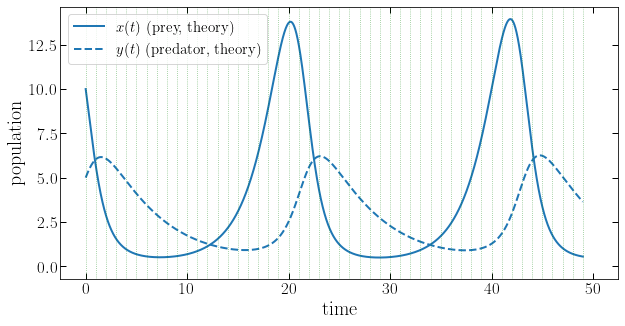

In [11]:
fig = plt.figure(figsize=(10,5))

gs0 = gridspec.GridSpec(1,1, width_ratios=[1.], height_ratios=[1.], wspace=1.)
ax0 = plt.subplot(gs0[0])

# Plot the theory, signal, and data
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
ax0.plot(t,Xtheory,ls="-",color="C0",label="$x(t)$ (prey, theory)")
ax0.plot(t,Ytheory,ls="--",color="C0",label="$y(t)$ (predator, theory)")
# ax0.plot(t_s,Xtsignal,ls="-",color="skyblue",label="$u_x(t)$ (prey, signal)")
# ax0.plot(t_s,Ytsignal,ls="--",color="skyblue",label="$u_y(t)$ (predator, signal)")
# ax0.plot(t,Xefficiency,ls=':',lw=2.5,color="C5")
# ax0.plot([0,S//2],[threshold,threshold],ls=':',lw=2.5,color="C5")
# ax0.plot(Xobs,Xdata,marker="o",ls="",color="black",label="$\Phi_x(t)$ (prey, data)")
# ax0.plot(Yobs,Ydata,marker="D",ls="",color="black",label="$\Phi_y(t)$ (predator, data)")
ax0.set_xlabel("time",size=20)
ax0.set_ylabel("population",size=20)
ax0.set_xlim([xmin,xmax])
ax0.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
# for i in range(len(masks)):
#     ax0.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.3)
ax0.legend(loc="upper left",fontsize=15)
    
plt.savefig('model_mean_0.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig('model_mean_0.png',dpi=100,bbox_inches="tight")

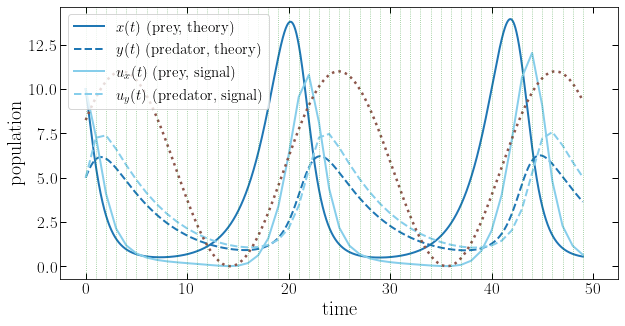

In [12]:
fig = plt.figure(figsize=(10,5))

gs0 = gridspec.GridSpec(1,1, width_ratios=[1.], height_ratios=[1.], wspace=1.)
ax0 = plt.subplot(gs0[0])

# Plot the theory, signal, and data
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
ax0.plot(t,Xtheory,ls="-",color="C0",label="$x(t)$ (prey, theory)")
ax0.plot(t,Ytheory,ls="--",color="C0",label="$y(t)$ (predator, theory)")
ax0.plot(t_s,Xtsignal,ls="-",color="skyblue",label="$u_x(t)$ (prey, signal)")
ax0.plot(t_s,Ytsignal,ls="--",color="skyblue",label="$u_y(t)$ (predator, signal)")
ax0.plot(t,Xefficiency,ls=':',lw=2.5,color="C5")
# ax0.plot([0,S//2],[threshold,threshold],ls=':',lw=2.5,color="C5")
# ax0.plot(Xobs,Xdata,marker="o",ls="",color="black",label="$\Phi_x(t)$ (prey, data)")
# ax0.plot(Yobs,Ydata,marker="D",ls="",color="black",label="$\Phi_y(t)$ (predator, data)")
ax0.set_xlabel("time",size=20)
ax0.set_ylabel("population",size=20)
ax0.set_xlim([xmin,xmax])
ax0.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
# for i in range(len(masks)):
#     ax0.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.3)
ax0.legend(loc="upper left",fontsize=15)
    
plt.savefig('model_mean_1.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig('model_mean_1.png',dpi=100,bbox_inches="tight")

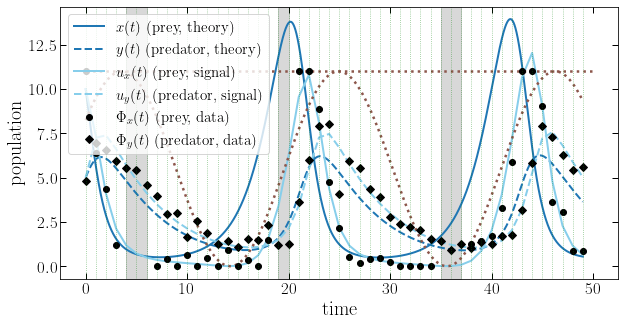

In [13]:
fig = plt.figure(figsize=(10,5))

gs0 = gridspec.GridSpec(1,1, width_ratios=[1.], height_ratios=[1.], wspace=1.)
ax0 = plt.subplot(gs0[0])

# Plot the theory, signal, and data
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
ax0.plot(t,Xtheory,ls="-",color="C0",label="$x(t)$ (prey, theory)")
ax0.plot(t,Ytheory,ls="--",color="C0",label="$y(t)$ (predator, theory)")
ax0.plot(t_s,Xtsignal,ls="-",color="skyblue",label="$u_x(t)$ (prey, signal)")
ax0.plot(t_s,Ytsignal,ls="--",color="skyblue",label="$u_y(t)$ (predator, signal)")
ax0.plot(t,Xefficiency,ls=':',lw=2.5,color="C5")
ax0.plot([0,S//2],[threshold,threshold],ls=':',lw=2.5,color="C5")
ax0.plot(Xobs,Xdata,marker="o",ls="",color="black",label="$\Phi_x(t)$ (prey, data)")
ax0.plot(Yobs,Ydata,marker="D",ls="",color="black",label="$\Phi_y(t)$ (predator, data)")
ax0.set_xlabel("time",size=20)
ax0.set_ylabel("population",size=20)
ax0.set_xlim([xmin,xmax])
ax0.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.3)
ax0.legend(loc="upper left",fontsize=15)
    
plt.savefig('model_mean_2.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig('model_mean_2.png',dpi=100,bbox_inches="tight")

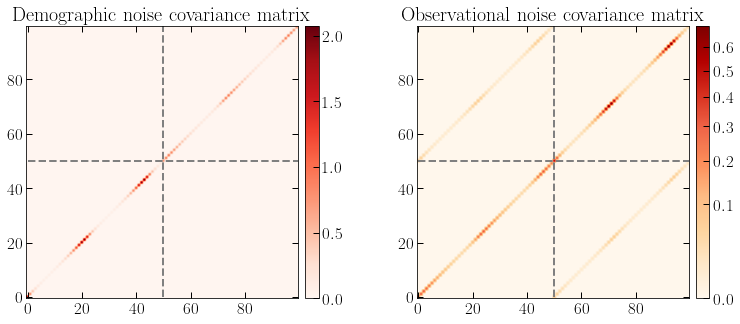

In [14]:
fig = plt.figure(figsize=(14,5))

gs1 = gridspec.GridSpec(1,2, wspace=0.)
ax1 = plt.subplot(gs1[0])
ax2 = plt.subplot(gs1[1])

# Plot the noise covariance matrix
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.xaxis.set_tick_params(which='major', length=6)
ax1.xaxis.set_tick_params(which='minor', length=4)
ax1.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1.yaxis.set_tick_params(which='major', length=6)
ax1.yaxis.set_tick_params(which='minor', length=4)
ax1.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax1.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
im1 = ax1.imshow(Dtsignal,origin="lower",cmap="Reds")
divider = make_axes_locatable(ax1)
ax1_cb = divider.new_horizontal(size="5%", pad=0.10)
ax1.set_title("Demographic noise covariance matrix",size=20)
fig.add_axes(ax1_cb)
cbar1 = fig.colorbar(im1, cax=ax1_cb)
cbar1.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2.xaxis.set_tick_params(which='major', length=6)
ax2.xaxis.set_tick_params(which='minor', length=4)
ax2.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2.yaxis.set_tick_params(which='major', length=6)
ax2.yaxis.set_tick_params(which='minor', length=4)
ax2.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax2.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
im2 = ax2.imshow(Otsignal,origin="lower",cmap="OrRd", norm=mcolors.PowerNorm(gamma=0.55))
ax2.set_title("Observational noise covariance matrix",size=20)
divider = make_axes_locatable(ax2)
ax2_cb = divider.new_horizontal(size="5%", pad=0.10)
fig.add_axes(ax2_cb)
cbar2 = fig.colorbar(im2, cax=ax2_cb)
cbar2.ax.tick_params(axis='y', direction='in', width=1.0, length=6)
    
plt.savefig('model_noise.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig('model_noise.png',dpi=100,bbox_inches="tight")

# Blackbox diagnostics

In [15]:
B=np.load("blackbox.npz", allow_pickle=True)
t_s=B["t_s"]; S=B["S"]; PX=B["PX"]; P=B["P"]; ymin_ref=B["ymin_ref"]; ymax_ref=B["ymax_ref"]
Xobs=B["Xobs"]; Yobs=B["Yobs"]
Xdata=B["Xdata"]; Ydata=B["Ydata"]
C_0A=B["C_0A"]; grad_fA=B["grad_fA"]; Phi_0A=B["Phi_0A"]; f_0A=B["f_0A"]
C_0B=B["C_0B"]; grad_fB=B["grad_fB"]; Phi_0B=B["Phi_0B"]; f_0B=B["f_0B"]
masks=B["masks"]

Xf_0A, Yf_0A = f_0A[0:PX], f_0A[PX:P]
XC_0A, YC_0A = C_0A[0:PX,0:PX], C_0A[PX:P,PX:P]

Xf_0B, Yf_0B = f_0B[0:PX], f_0B[PX:P]
XC_0B, YC_0B = C_0B[0:PX,0:PX], C_0B[PX:P,PX:P]

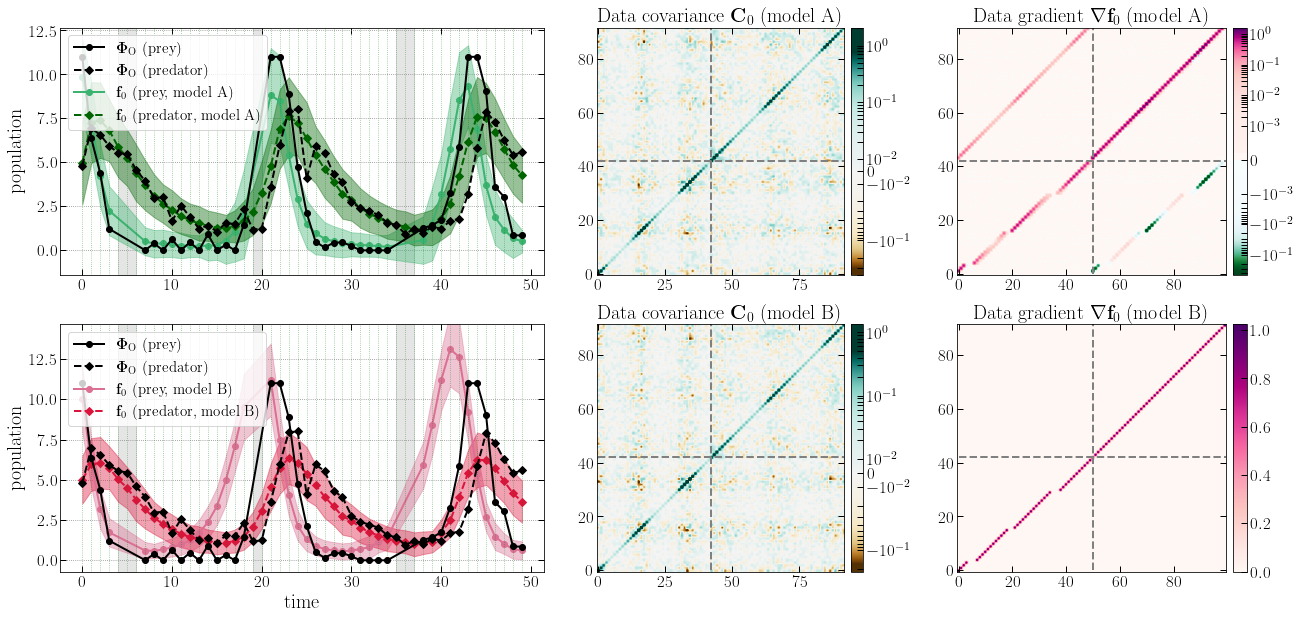

In [16]:
fig = plt.figure(figsize=(22,10))

gs0 = gridspec.GridSpec(2,3, width_ratios=[1.3,1.,1.], height_ratios=[1.,1.], wspace=0., hspace=0.2)
ax0a = plt.subplot(gs0[0,0])
ax0b = plt.subplot(gs0[1,0], sharex=ax0a)
ax1a = plt.subplot(gs0[0,1])
ax1b = plt.subplot(gs0[1,1], sharex=ax1a)
ax2a = plt.subplot(gs0[0,2])
ax2b = plt.subplot(gs0[1,2], sharex=ax2a)

# Plot the data, mean blackbox and standard deviation
ax0a.yaxis.grid(linestyle=':',color="grey")
ax0a.xaxis.set_ticks_position('both')
ax0a.yaxis.set_ticks_position('both')
ax0a.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0a.xaxis.set_tick_params(which='major', length=6)
ax0a.xaxis.set_tick_params(which='minor', length=4)
ax0a.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0a.yaxis.set_tick_params(which='major', length=6)
ax0a.plot(Xobs,Xdata,marker="o",ls="-",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (prey)",zorder=5)
ax0a.plot(Yobs,Ydata,marker="D",ls="--",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (predator)",zorder=5)
ax0a.plot(Xobs,Xf_0A,marker="o",ls="-",color="mediumseagreen",label="$\\textbf{f}_0$ (prey, model A)")
ax0a.plot(Yobs,Yf_0A,marker="D",ls="--",color="darkgreen",label="$\\textbf{f}_0$ (predator, model A)")
ax0a.fill_between(Xobs,Xf_0A-2*np.sqrt(np.diag(XC_0A)),
               Xf_0A+2*np.sqrt(np.diag(XC_0A)),
               color="mediumseagreen",alpha=0.4,zorder=2)
ax0a.fill_between(Yobs,Yf_0A-2*np.sqrt(np.diag(YC_0A)),
               Yf_0A+2*np.sqrt(np.diag(YC_0A)),
               color="darkgreen",alpha=0.4,zorder=2)
(ymin,ymax)=ax0a.get_ylim()
ax0a.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0a.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0a.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0a.set_ylabel("population",size=20)
ax0a.legend(loc="upper left",fontsize=15)

ax0b.yaxis.grid(linestyle=':',color="grey")
ax0b.xaxis.set_ticks_position('both')
ax0b.yaxis.set_ticks_position('both')
ax0b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.xaxis.set_tick_params(which='major', length=6)
ax0b.xaxis.set_tick_params(which='minor', length=4)
ax0b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.yaxis.set_tick_params(which='major', length=6)
ax0b.plot(Xobs,Xdata,marker="o",ls="-",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (prey)",zorder=5)
ax0b.plot(Yobs,Ydata,marker="D",ls="--",color="black",label="$\\boldsymbol{\Phi}_\mathrm{O}$ (predator)",zorder=5)
ax0b.plot(Xobs,Xf_0B,marker="o",ls="-",color="palevioletred",label="$\\textbf{f}_0$ (prey, model B)")
ax0b.plot(Yobs,Yf_0B,marker="D",ls="--",color="crimson",label="$\\textbf{f}_0$ (predator, model B)")
ax0b.fill_between(Xobs,Xf_0B-2*np.sqrt(np.diag(XC_0B)),
               Xf_0B+2*np.sqrt(np.diag(XC_0B)),
               color="palevioletred",alpha=0.4,zorder=2)
ax0b.fill_between(Yobs,Yf_0B-2*np.sqrt(np.diag(YC_0B)),
               Yf_0B+2*np.sqrt(np.diag(YC_0B)),
               color="crimson",alpha=0.4,zorder=2)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0b.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0b.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0b.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0b.set_xlabel("time",size=20)
ax0b.set_ylabel("population",size=20)
ax0b.legend(loc="upper left",fontsize=15)

# Plot the data covariance matrix at the expansion point
ax1a.xaxis.set_ticks_position('both')
ax1a.yaxis.set_ticks_position('both')
ax1a.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1a.xaxis.set_tick_params(which='major', length=6)
ax1a.xaxis.set_tick_params(which='minor', length=4)
ax1a.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1a.yaxis.set_tick_params(which='major', length=6)
ax1a.yaxis.set_tick_params(which='minor', length=4)
ax1a.plot([0,P],[PX,PX],color='grey',linestyle='--')
ax1a.plot([PX,PX],[0,P],color='grey',linestyle='--')
im1a = ax1a.imshow(C_0A,origin="lower",cmap=CovarianceMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=0.01, linscale=0.2, vmin=C_0A.min(), vmax=C_0A.max()))
ax1a.set_title("Data covariance $\\textbf{C}_0$ (model A)",size=20)
divider = make_axes_locatable(ax1a)
ax1a_cb = divider.new_horizontal(size="5%", pad=0.10)
fig.add_axes(ax1a_cb)
cbar1a = fig.colorbar(im1a, cax=ax1a_cb)
cbar1a.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

ax1b.xaxis.set_ticks_position('both')
ax1b.yaxis.set_ticks_position('both')
ax1b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1b.xaxis.set_tick_params(which='major', length=6)
ax1b.xaxis.set_tick_params(which='minor', length=4)
ax1b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax1b.yaxis.set_tick_params(which='major', length=6)
ax1b.yaxis.set_tick_params(which='minor', length=4)
ax1b.plot([0,P],[PX,PX],color='grey',linestyle='--')
ax1b.plot([PX,PX],[0,P],color='grey',linestyle='--')
im1b = ax1b.imshow(C_0B,origin="lower",cmap=CovarianceMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=0.01, linscale=0.2, vmin=C_0B.min(), vmax=C_0B.max()))
ax1b.set_title("Data covariance $\\textbf{C}_0$ (model B)",size=20)
divider = make_axes_locatable(ax1b)
ax1b_cb = divider.new_horizontal(size="5%", pad=0.10)
fig.add_axes(ax1b_cb)
cbar1b = fig.colorbar(im1b, cax=ax1b_cb)
cbar1b.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

# Plot the gradient of the blackbox
ax2a.xaxis.set_ticks_position('both')
ax2a.yaxis.set_ticks_position('both')
ax2a.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2a.xaxis.set_tick_params(which='major', length=6)
ax2a.xaxis.set_tick_params(which='minor', length=4)
ax2a.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2a.yaxis.set_tick_params(which='major', length=6)
ax2a.yaxis.set_tick_params(which='minor', length=4)
divider = make_axes_locatable(ax2a)
ax2a_cb = divider.new_horizontal(size="5%", pad=0.10)
ax2a.plot([0,S],[PX,PX],color='grey',linestyle='--')
ax2a.plot([S//2,S//2],[0,P],color='grey',linestyle='--')
im2a = ax2a.imshow(grad_fA,origin="lower",cmap=GradientMap,norm=MidpointSymLogNorm(midpoint=0.,
                                            linthresh=1e-3, linscale=1, vmin=grad_fA.min(), vmax=grad_fA.max()))
ax2a.set_title("Data gradient $\\nabla \\textbf{f}_0$ (model A)",size=20)
fig.add_axes(ax2a_cb)
cbar2a = fig.colorbar(im2a, cax=ax2a_cb)
cbar2a.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

ax2b.xaxis.set_ticks_position('both')
ax2b.yaxis.set_ticks_position('both')
ax2b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2b.xaxis.set_tick_params(which='major', length=6)
ax2b.xaxis.set_tick_params(which='minor', length=4)
ax2b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax2b.yaxis.set_tick_params(which='major', length=6)
ax2b.yaxis.set_tick_params(which='minor', length=4)
ax2b.plot([0,S],[PX,PX],color='grey',linestyle='--')
ax2b.plot([S//2,S//2],[0,P],color='grey',linestyle='--')
im2b = ax2b.imshow(grad_fB,origin="lower",cmap='RdPu',vmin=grad_fB.min(),vmax=grad_fB.max())
ax2b.set_title("Data gradient $\\nabla \\textbf{f}_0$ (model B)",size=20)
divider = make_axes_locatable(ax2b)
ax2b_cb = divider.new_horizontal(size="5%", pad=0.10)
fig.add_axes(ax2b_cb)
cbar2b = fig.colorbar(im2b, cax=ax2b_cb)
cbar2b.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

plt.savefig('blackbox.pdf',dpi=300,bbox_inches="tight",transparent=True)
plt.savefig('blackbox.png',dpi=100,bbox_inches="tight")

# SELFI Prior

In [17]:
C=np.load("selfi.npz", allow_pickle=True)
t=C["t"];t_s=C["t_s"];Nfid=C["Nfid"];S=C["S"];ymin_ref=C["ymin_ref"];ymax_ref=C["ymax_ref"]
Xthfid=C["Xthfid"];Xtheory=C["Xtheory"];Xexp=C["Xexp"];XpostA=C["XpostA"];XpostB=C["XpostB"]
Ythfid=C["Ythfid"];Ytheory=C["Ytheory"];Yexp=C["Yexp"];YpostA=C["YpostA"];YpostB=C["YpostB"]
sigma_pA=C["sigma_pA"];sigma_tA=C["sigma_tA"];sigma_pB=C["sigma_pB"];sigma_tB=C["sigma_tB"]
SA=C["SA"];SB=C["SB"];GammaA=C["GammaA"];GammaB=C["GammaB"]
masks=C["masks"]

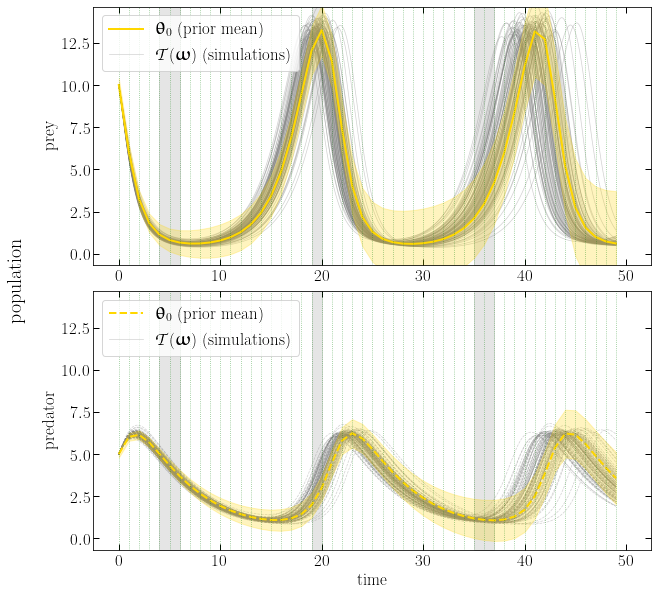

In [18]:
fig = plt.figure(figsize=(10,10))

gs0 = gridspec.GridSpec(2,1, width_ratios=[1.], height_ratios=[1.,1.], hspace=0.1)
ax0 = plt.subplot(gs0[0])
ax0b = plt.subplot(gs0[1], sharex=ax0)

# Plot the expansion function and the prior uncertainty
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.xaxis.set_tick_params(which='major', length=6)
ax0.xaxis.set_tick_params(which='minor', length=4)
ax0.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0.yaxis.set_tick_params(which='major', length=6)
ax0.set_ylabel("prey")
ax0.plot(t_s,Xexp,ls="-",color="gold",label="$\\boldsymbol{\\uptheta}_0$ (prior mean)",zorder=2)
ax0.plot(t,Xthfid[0],ls="-",color="C7",label="$\\mathpzc{T}(\\boldsymbol{\\upomega})$ (simulations)",alpha=0.35,linewidth=0.7,zorder=0.5)
for n in range(1,Nfid):
    ax0.plot(t,Xthfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0.fill_between(t_s,Xexp-2*sigma_tA[0:S//2],Xexp+2*sigma_tA[0:S//2],color="gold",alpha=0.25,zorder=2)
(xmin,xmax)=(xmin_ref,xmax_ref)
ax0.set_xlim([xmin,xmax])
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0.legend(loc="upper left")

ax0b.xaxis.set_ticks_position('both')
ax0b.yaxis.set_ticks_position('both')
ax0b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.xaxis.set_tick_params(which='major', length=6)
ax0b.xaxis.set_tick_params(which='minor', length=4)
ax0b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.yaxis.set_tick_params(which='major', length=6)
ax0b.set_ylabel("predator")
ax0b.set_xlabel("time")
ax0b.plot(t_s,Yexp,ls="--",color="gold",label="$\\boldsymbol{\\uptheta}_0$ (prior mean)",zorder=2)
ax0b.plot(t,Ythfid[0],ls="-",color="C7",label="$\\mathpzc{T}(\\boldsymbol{\\upomega})$ (simulations)",alpha=0.35,linewidth=0.7,zorder=0.5)
for n in range(1,Nfid):
    ax0b.plot(t,Ythfid[n],ls="--",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0b.fill_between(t_s,Yexp-2*sigma_tA[S//2:S],Yexp+2*sigma_tA[S//2:S],color="gold",alpha=0.25,zorder=2)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0b.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0b.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0b.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0b.legend(loc="upper left")

plt.text(-11,13,"population",rotation="vertical",size=20)

plt.savefig("prior.pdf",dpi=300,bbox_inches="tight",transparent=True)
plt.savefig("prior.png",dpi=100,bbox_inches="tight")

# SELFI Posterior

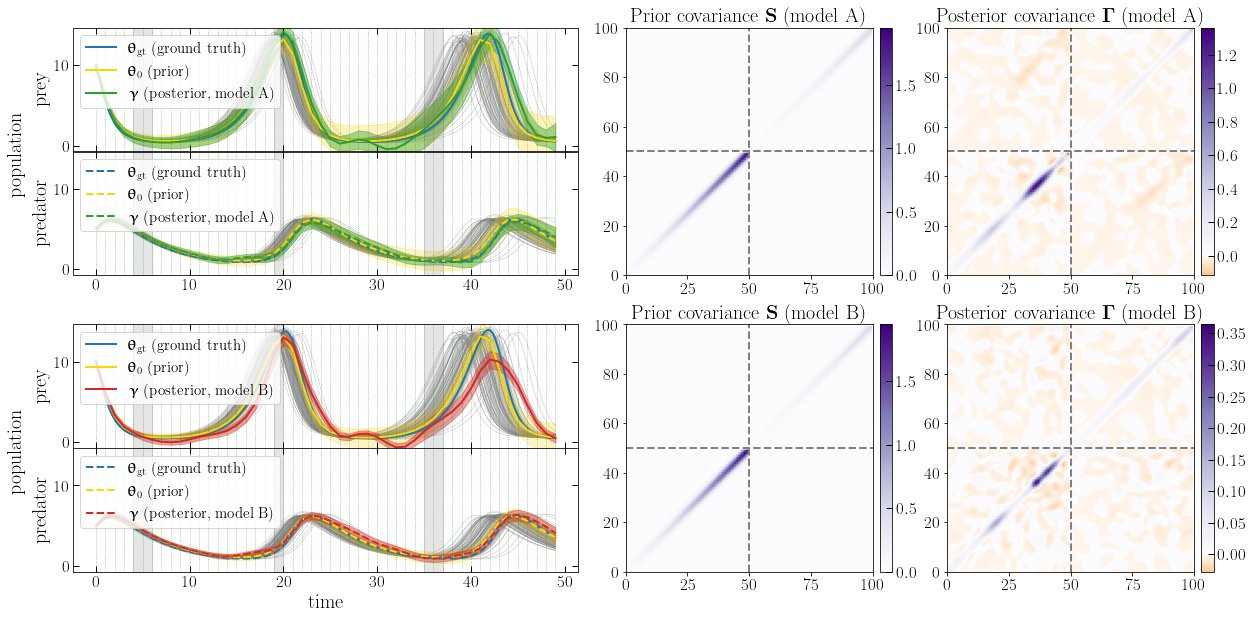

In [19]:
fig = plt.figure(figsize=(22,10))

gs0 = gridspec.GridSpec(4,3, width_ratios=[1.4,1.,1.], height_ratios=[1.,1.,1.,1.], wspace=0., hspace=0.5)
ax0a = plt.subplot(gs0[0,0])
ax0b = plt.subplot(gs0[1,0])
ax0c = plt.subplot(gs0[2,0])
ax0d = plt.subplot(gs0[3,0])
ax1a = plt.subplot(gs0[0:2,1])
ax1b = plt.subplot(gs0[2:4,1], sharex=ax1a)
ax2a = plt.subplot(gs0[0:2,2])
ax2b = plt.subplot(gs0[2:4,2], sharex=ax2a)

add = 0.137
pos0a = ax0a.get_position()
pos0a_bounds = np.array(pos0a.bounds)
pos0a_bounds[1]-=add/4
pos0a_bounds[3]+=add/4

pos0b = ax0b.get_position()
pos0b_bounds = np.array(pos0b.bounds)
pos0b_bounds[3]+=add/4

pos0c = ax0c.get_position()
pos0c_bounds = np.array(pos0c.bounds)
pos0c_bounds[1]-=add/4
pos0c_bounds[3]+=add/4

pos0d = ax0d.get_position()
pos0d_bounds = np.array(pos0d.bounds)
pos0d_bounds[3]+=add/4

ax0a.set_position(Bbox.from_bounds(*pos0a_bounds))
ax0b.set_position(Bbox.from_bounds(*pos0b_bounds))
ax0c.set_position(Bbox.from_bounds(*pos0c_bounds))
ax0d.set_position(Bbox.from_bounds(*pos0d_bounds))

pos2a = ax2a.get_position()
pos2a_bounds = np.array(pos2a.bounds)
pos2b = ax2b.get_position()
pos2b_bounds = np.array(pos2b.bounds)
pos2a_bounds[0]-=0.025
pos2b_bounds[0]-=0.025
ax2a.set_position(Bbox.from_bounds(*pos2a_bounds))
ax2b.set_position(Bbox.from_bounds(*pos2b_bounds))

# Plot the expansion function, prior, and posterior
ax0a.xaxis.set_ticks_position('both')
ax0a.yaxis.set_ticks_position('both')
ax0a.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0a.xaxis.set_tick_params(which='major', length=6)
ax0a.xaxis.set_tick_params(which='minor', length=4)
ax0a.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0a.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0a.plot(t,Xthfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0a.plot(t,Xtheory,ls="-",color="C0",label="$\\boldsymbol{\\uptheta}_{\mathrm{gt}}$ (ground truth)")
ax0a.plot(t_s,Xexp,ls="-",color="gold",label="$\\boldsymbol{\\uptheta}_0$ (prior)")
ax0a.fill_between(t_s,Xexp-2*sigma_tA[0:S//2],Xexp+2*sigma_tA[0:S//2],color="gold",alpha=0.25)
ax0a.plot(t_s,XpostA,ls="-",color="C2",label="$\\boldsymbol{\\upgamma}$ (posterior, model A)")
ax0a.fill_between(t_s,XpostA-2*sigma_pA[0:S//2],XpostA+2*sigma_pA[0:S//2],color="C2",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0a.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0a.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0a.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0a.set_xticklabels("")
ax0a.set_ylabel("prey",size=20)
ax0a.legend(loc="upper left",fontsize=15)

ax0b.xaxis.set_ticks_position('both')
ax0b.yaxis.set_ticks_position('both')
ax0b.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.xaxis.set_tick_params(which='major', length=6)
ax0b.xaxis.set_tick_params(which='minor', length=4)
ax0b.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0b.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0b.plot(t,Ythfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0b.plot(t,Ytheory,ls="--",color="C0",label="$\\boldsymbol{\\uptheta}_{\mathrm{gt}}$ (ground truth)")
ax0b.plot(t_s,Yexp,ls="--",color="gold",label="$\\boldsymbol{\\uptheta}_0$ (prior)")
ax0b.fill_between(t_s,Yexp-2*sigma_tA[S//2:S],Yexp+2*sigma_tA[S//2:S],color="gold",alpha=0.25)
ax0b.plot(t_s,YpostA,ls="--",color="C2",label="$\\boldsymbol{\\upgamma}$ (posterior, model A)")
ax0b.fill_between(t_s,YpostA-2*sigma_pA[S//2:S],YpostA+2*sigma_pA[S//2:S],color="C2",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0b.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0b.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0b.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0b.set_ylabel("predator",size=20)
ax0b.legend(loc="upper left",fontsize=15)

ax0c.xaxis.set_ticks_position('both')
ax0c.yaxis.set_ticks_position('both')
ax0c.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0c.xaxis.set_tick_params(which='major', length=6)
ax0c.xaxis.set_tick_params(which='minor', length=4)
ax0c.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0c.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0c.plot(t,Xthfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0c.plot(t,Xtheory,ls="-",color="C0",label="$\\boldsymbol{\\uptheta}_{\mathrm{gt}}$ (ground truth)")
ax0c.plot(t_s,Xexp,ls="-",color="gold",label="$\\boldsymbol{\\uptheta}_0$ (prior)")
ax0c.fill_between(t_s,Xexp-2*sigma_tB[0:S//2],Xexp+2*sigma_tB[0:S//2],color="gold",alpha=0.25)
ax0c.plot(t_s,XpostB,ls="-",color="C3",label="$\\boldsymbol{\\upgamma}$ (posterior, model B)")
ax0c.fill_between(t_s,XpostB-2*sigma_pB[0:S//2],XpostB+2*sigma_pB[0:S//2],color="C3",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0c.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0c.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0c.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0c.set_xticklabels("")
ax0c.set_ylabel("prey",size=20)
ax0c.legend(loc="upper left",fontsize=15)

ax0d.xaxis.set_ticks_position('both')
ax0d.yaxis.set_ticks_position('both')
ax0d.xaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0d.xaxis.set_tick_params(which='major', length=6)
ax0d.xaxis.set_tick_params(which='minor', length=4)
ax0d.yaxis.set_tick_params(which='both', direction='in', width=1.0)
ax0d.yaxis.set_tick_params(which='major', length=6)
for n in range(Nfid):
    ax0d.plot(t,Ythfid[n],ls="-",color="C7",alpha=0.35,linewidth=0.7,zorder=0.5)
ax0d.plot(t,Ytheory,ls="--",color="C0",label="$\\boldsymbol{\\uptheta}_{\mathrm{gt}}$ (ground truth)")
ax0d.plot(t_s,Yexp,ls="--",color="gold",label="$\\boldsymbol{\\uptheta}_0$ (prior)")
ax0d.fill_between(t_s,Yexp-2*sigma_tB[S//2:S],Yexp+2*sigma_tB[S//2:S],color="gold",alpha=0.25)
ax0d.plot(t_s,YpostB,ls="--",color="C3",label="$\\boldsymbol{\\upgamma}$ (posterior, model B)")
ax0d.fill_between(t_s,YpostB-2*sigma_pB[S//2:S],YpostB+2*sigma_pB[S//2:S],color="C3",alpha=0.4)
(ymin,ymax)=(ymin_ref,ymax_ref)
ax0d.set_ylim([ymin,ymax])
for i in range(len(t_s)):
    ax0d.plot([t_s[i],t_s[i]],[ymin,ymax],linestyle=':',linewidth=0.8,color='green',alpha=0.5)
for i in range(len(masks)):
    ax0d.fill_between(masks[i],np.ones_like(masks[i])*ymin,np.ones_like(masks[i])*ymax,color="C7",alpha=0.2)
ax0d.set_xlabel("time",size=20)
ax0d.set_ylabel("predator",size=20)
ax0d.legend(loc="upper left",fontsize=15)

# Plot the prior covariance matrix
divider = make_axes_locatable(ax1a)
ax1a_cb = divider.new_horizontal(size="5%", pad=0.10)
im1a = ax1a.imshow(SA,origin="lower",cmap="Purples")
ax1a.set_xlim([0,S])
ax1a.set_ylim([0,S])
ax1a.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax1a.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax1a.set_title("Prior covariance $\\textbf{S}$ (model A)",size=20)
fig.add_axes(ax1a_cb)
cbar1a = fig.colorbar(im1a, cax=ax1a_cb)
cbar1a.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

divider = make_axes_locatable(ax1b)
ax1b_cb = divider.new_horizontal(size="5%", pad=0.10)
im1b = ax1b.imshow(SB,origin="lower",cmap="Purples")
ax1b.set_xlim([0,S])
ax1b.set_ylim([0,S])
ax1b.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax1b.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax1b.set_title("Prior covariance $\\textbf{S}$ (model B)",size=20)
fig.add_axes(ax1b_cb)
cbar1b = fig.colorbar(im1b, cax=ax1b_cb)
cbar1b.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

# Plot the posterior covariance matrix
divider = make_axes_locatable(ax2a)
ax2a_cb = divider.new_horizontal(size="5%", pad=0.10)
im2a = ax2a.imshow(GammaA,origin="lower",cmap=Purples_Oranges,norm=MidpointNormalize(midpoint=0.))
ax2a.set_xlim([0,S])
ax2a.set_ylim([0,S])
ax2a.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax2a.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax2a.set_title("Posterior covariance $\\boldsymbol{\\Gamma}$ (model A)",size=20)
fig.add_axes(ax2a_cb)
cbar2a = fig.colorbar(im2a, cax=ax2a_cb)
cbar2a.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

divider = make_axes_locatable(ax2b)
ax2b_cb = divider.new_horizontal(size="5%", pad=0.10)
im2b = ax2b.imshow(GammaB,origin="lower",cmap=Purples_Oranges,norm=MidpointNormalize(midpoint=0.))
ax2b.set_xlim([0,S])
ax2b.set_ylim([0,S])
ax2b.plot([0,S],[S//2,S//2],color='grey',linestyle='--')
ax2b.plot([S//2,S//2],[0,S],color='grey',linestyle='--')
ax2b.set_title("Posterior covariance $\\boldsymbol{\\Gamma}$ (model B)",size=20)
fig.add_axes(ax2b_cb)
cbar2b = fig.colorbar(im2b, cax=ax2b_cb)
cbar2b.ax.tick_params(axis='y', direction='in', width=1.0, length=6)

plt.text(-37.8,0.57,"population",rotation="vertical",size=20)
plt.text(-37.8,0.10,"population",rotation="vertical",size=20)

plt.savefig("selfi.pdf",dpi=300,bbox_inches="tight",transparent=True)
plt.savefig("selfi.png",dpi=100,bbox_inches="tight")

# ABC Posterior

In [20]:
D=np.load("abc.npz", allow_pickle=True)
epsilon=D["epsilon"][()]; compressed_data=D["compressed_data"];
alpha_samples=D["alpha_samples"][()]; beta_samples=D["beta_samples"][()]; gamma_samples=D["gamma_samples"][()]; 
delta_samples=D["delta_samples"][()]; comp_samples=D["comp_samples"][()];
alpha_pool=D["alpha_pool"]; beta_pool=D["beta_pool"]; gamma_pool=D["gamma_pool"]; 
delta_pool=D["delta_pool"]; pdf_alpha=D["pdf_alpha"]; pdf_beta=D["pdf_beta"]; pdf_gamma=D["pdf_gamma"]; 
pdf_delta=D["pdf_delta"]; prior_a=D["prior_a"]; prior_b=D["prior_b"]; prior_c=D["prior_c"]; prior_d=D["prior_d"]; 
kde_ab=D["kde_ab"]; kde_ac=D["kde_ac"]; kde_ad=D["kde_ad"]; kde_bc=D["kde_bc"]; kde_bd=D["kde_bd"]; kde_cd=D["kde_cd"]; 
prior_ab=D["prior_ab"]; prior_ac=D["prior_ac"]; prior_ad=D["prior_ad"]; prior_bc=D["prior_bc"]; prior_bd=D["prior_bd"]; 
prior_cd=D["prior_cd"]; 
alphamin=D["alphamin"]; alphamax=D["alphamax"]; alphas=D["alphas"]; 
betamin=D["betamin"]; betamax=D["betamax"]; betas=D["betas"]; 
gammamin=D["gammamin"]; gammamax=D["gammamax"]; gammas=D["gammas"]; 
deltamin=D["deltamin"]; deltamax=D["deltamax"]; deltas=D["deltas"]; 
alpha_gt=D["alpha_gt"]; beta_gt=D["beta_gt"]; gamma_gt=D["gamma_gt"]; delta_gt=D["delta_gt"]; 
alpha_exp=D["alpha_exp"]; beta_exp=D["beta_exp"]; gamma_exp=D["gamma_exp"]; delta_exp=D["delta_exp"];

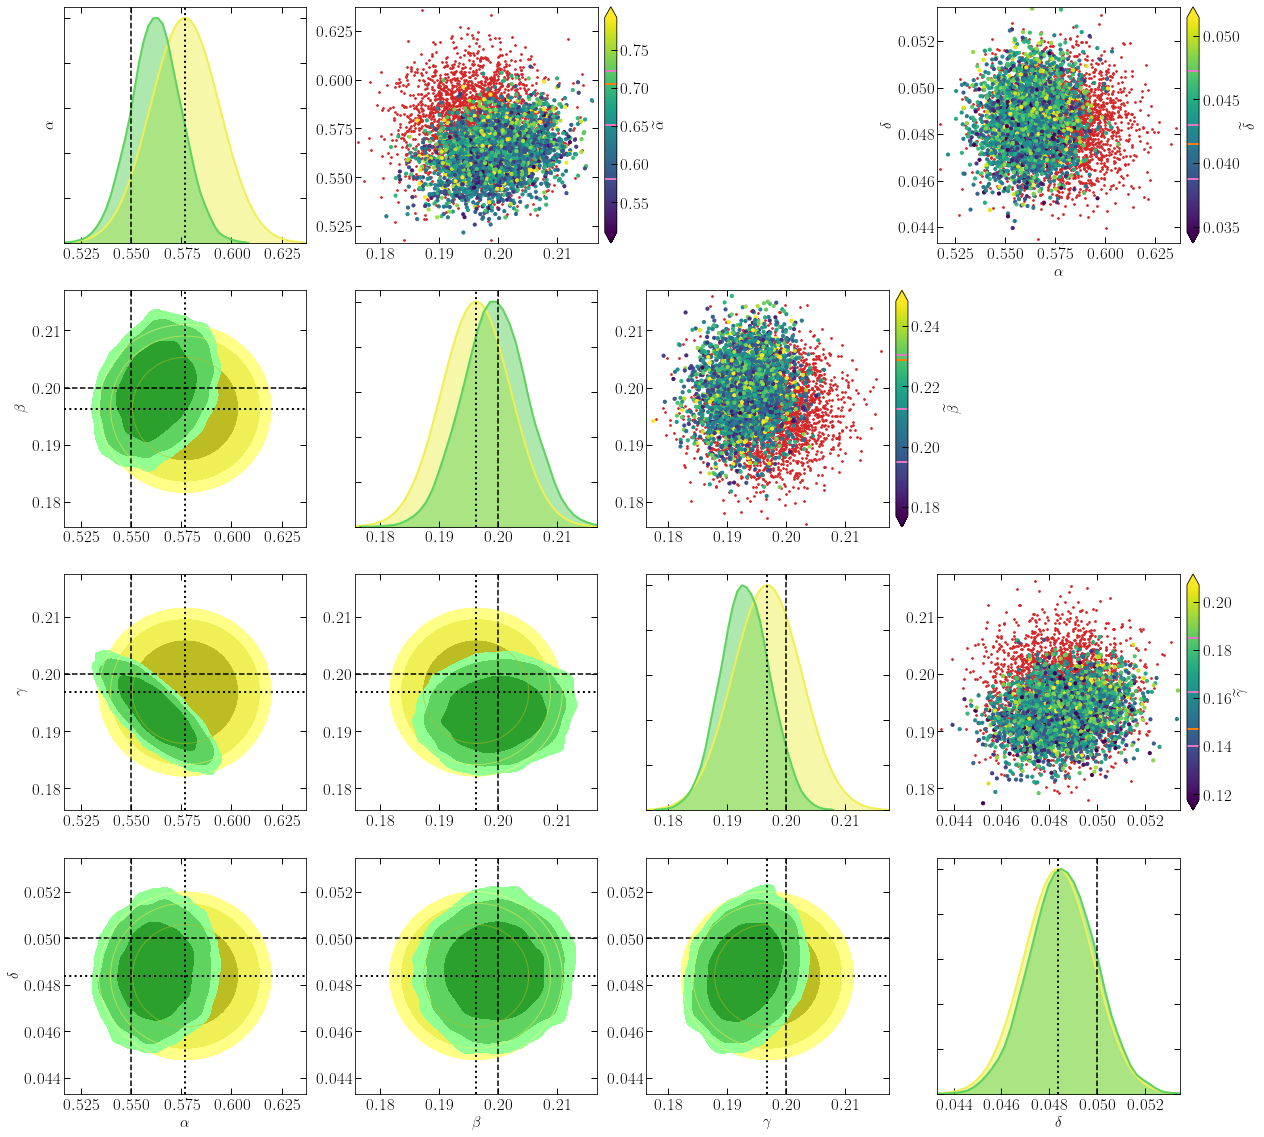

In [21]:
N=3000
fig = plt.figure(figsize=(20,20))

gs0 = gridspec.GridSpec(4,4, width_ratios=[1.,1.,1.,1.], height_ratios=[1.,1.,1.,1.], wspace=0.2, hspace=0.2)

ax0a = plt.subplot(gs0[0,0])
ax0b = plt.subplot(gs0[1,0])
ax0c = plt.subplot(gs0[2,0])
ax0d = plt.subplot(gs0[3,0])
ax1a = plt.subplot(gs0[0,1])
ax1b = plt.subplot(gs0[1,1])
ax1c = plt.subplot(gs0[2,1])
ax1d = plt.subplot(gs0[3,1])
# ax2a = plt.subplot(gs0[0,2])
ax2b = plt.subplot(gs0[1,2])
ax2c = plt.subplot(gs0[2,2])
ax2d = plt.subplot(gs0[3,2])
ax3a = plt.subplot(gs0[0,3])
# ax3b = plt.subplot(gs0[1,3])
ax3c = plt.subplot(gs0[2,3])
ax3d = plt.subplot(gs0[3,3])

pos1a = ax1a.get_position()
pos1a_bounds = np.array(pos1a.bounds)
pos1a_bounds[2]+=0.0135
ax1a.set_position(Bbox.from_bounds(*pos1a_bounds))

pos2b = ax2b.get_position()
pos2b_bounds = np.array(pos2b.bounds)
pos2b_bounds[2]+=0.0135
ax2b.set_position(Bbox.from_bounds(*pos2b_bounds))

pos3a = ax3a.get_position()
pos3a_bounds = np.array(pos3a.bounds)
pos3a_bounds[2]+=0.0135
ax3a.set_position(Bbox.from_bounds(*pos3a_bounds))

pos3c = ax3c.get_position()
pos3c_bounds = np.array(pos3c.bounds)
pos3c_bounds[2]+=0.0135
ax3c.set_position(Bbox.from_bounds(*pos3c_bounds))

for ax in {ax0a,ax0b,ax0c,ax0d,ax1a,ax1b,ax1c,ax1d,ax2b,ax2c,ax2d,ax3a,ax3c,ax3d}:
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_tick_params(which='both', direction='in', width=1.0)
    ax.xaxis.set_tick_params(which='major', length=6)
    ax.xaxis.set_tick_params(which='minor', length=4)
    ax.yaxis.set_tick_params(which='both', direction='in', width=1.0)
    ax.yaxis.set_tick_params(which='major', length=6)
for ax in {ax1a,ax1b,ax1c,ax1d,ax2b,ax2c,ax2d}:
    ax.set_xticks([0.18,0.19,0.20,0.21])
for ax in {ax0a,ax0b,ax0c,ax0d,ax3a}:
    ax.set_xticks([0.525,0.550,0.575,0.600,0.625])
for ax in {ax3c,ax3d}:
    ax.set_xticks([0.044,0.046,0.048,0.050,0.052])

# Score compression
alphatilde_samples = comp_samples[epsilon][:,0]
alphatildemin = alphatilde_samples.mean()-2*alphatilde_samples.std()
alphatildemax = alphatilde_samples.mean()+2*alphatilde_samples.std()
# ax1a.set_xlabel("$\\beta$",fontsize=15)
# ax1a.set_ylabel("$\\alpha$",fontsize=15)
# ax1a.set_title("$\\tilde{\\alpha}}$",fontsize=15)
ax1a.set_xlim([betamin,betamax])
ax1a.set_ylim([alphamin,alphamax])
im1a0 = ax1a.scatter(beta_pool[:N], alpha_pool[:N], color='C3', s=3.)
im1a1 = ax1a.scatter(beta_samples[epsilon][:N], alpha_samples[epsilon][:N], c=alphatilde_samples[:N],
                     cmap='viridis', s=10., vmin=alphatildemin, vmax=alphatildemax)
divider = make_axes_locatable(ax1a)
ax1a_cb = divider.new_horizontal(size="5%", pad=0.10)
fig.add_axes(ax1a_cb)
cbar1a = fig.colorbar(im1a1, cax=ax1a_cb, extend='both')
cbar1a.ax.axhline(alphatilde_samples.mean(),color="C6",lw=2)
cbar1a.ax.axhline(alphatilde_samples.mean()-alphatilde_samples.std(),color="C6",lw=2)
cbar1a.ax.axhline(alphatilde_samples.mean()+alphatilde_samples.std(),color="C6",lw=2)
cbar1a.ax.axhline(compressed_data[0],color="C1",lw=2)
cbar1a.ax.tick_params(axis='y', direction='in', width=1.0, length=6)
cbar1a.ax.set_ylabel("$\\widetilde{\\alpha}$",fontsize=15)

deltatilde_samples = comp_samples[epsilon][:,3]
deltatildemin = deltatilde_samples.mean()-2*deltatilde_samples.std()
deltatildemax = deltatilde_samples.mean()+2*deltatilde_samples.std()
ax3a.set_xlabel("$\\alpha$",fontsize=15)
ax3a.set_ylabel("$\\delta$",fontsize=15)
# ax3a.set_title("$\\tilde{\\delta}}$",fontsize=15)
ax3a.set_xlim([alphamin,alphamax])
ax3a.set_ylim([deltamin,deltamax])
im3a0 = ax3a.scatter(alpha_pool[:N], delta_pool[:N], color='C3', s=3.)
im3a1 = ax3a.scatter(alpha_samples[epsilon][:N], delta_samples[epsilon][:N], c=deltatilde_samples[:N],
                     cmap='viridis', s=10., vmin=deltatildemin, vmax=deltatildemax)
divider = make_axes_locatable(ax3a)
ax3a_cb = divider.new_horizontal(size="5%", pad=0.10)
fig.add_axes(ax3a_cb)
cbar3a = fig.colorbar(im3a1, cax=ax3a_cb, extend='both')
cbar3a.ax.axhline(deltatilde_samples.mean(),color="C6",lw=2)
cbar3a.ax.axhline(deltatilde_samples.mean()-deltatilde_samples.std(),color="C6",lw=2)
cbar3a.ax.axhline(deltatilde_samples.mean()+deltatilde_samples.std(),color="C6",lw=2)
cbar3a.ax.axhline(compressed_data[3],color="C1",lw=2)
cbar3a.ax.tick_params(axis='y', direction='in', width=1.0, length=6)
cbar3a.ax.set_ylabel("$\\widetilde{\\delta}$",fontsize=15)

betatilde_samples = comp_samples[epsilon][:,1]
betatildemin = betatilde_samples.mean()-2*betatilde_samples.std()
betatildemax = betatilde_samples.mean()+2*betatilde_samples.std()
# ax2b.set_xlabel("$\\gamma$",fontsize=15)
# ax2b.set_ylabel("$\\beta$",fontsize=15)
# ax2b.set_title("$\\tilde{\\beta}}$",fontsize=15)
ax2b.set_xlim([gammamin,gammamax])
ax2b.set_ylim([betamin,betamax])
im2b0 = ax2b.scatter(gamma_pool[:N], beta_pool[:N], color='C3', s=3.)
im2b1 = ax2b.scatter(gamma_samples[epsilon][:N], beta_samples[epsilon][:N], c=betatilde_samples[:N],
                     cmap='viridis', s=10., vmin=betatildemin, vmax=betatildemax)
divider = make_axes_locatable(ax2b)
ax2b_cb = divider.new_horizontal(size="5%", pad=0.10)
fig.add_axes(ax2b_cb)
cbar2b = fig.colorbar(im2b1, cax=ax2b_cb, extend='both')
cbar2b.ax.axhline(betatilde_samples.mean(),color="C6",lw=2)
cbar2b.ax.axhline(betatilde_samples.mean()-betatilde_samples.std(),color="C6",lw=2)
cbar2b.ax.axhline(betatilde_samples.mean()+betatilde_samples.std(),color="C6",lw=2)
cbar2b.ax.axhline(compressed_data[1],color="C1",lw=2)
cbar2b.ax.tick_params(axis='y', direction='in', width=1.0, length=6)
cbar2b.ax.set_ylabel("$\\widetilde{\\beta}$",fontsize=15)

gammatilde_samples = comp_samples[epsilon][:,2]
gammatildemin = gammatilde_samples.mean()-2*gammatilde_samples.std()
gammatildemax = gammatilde_samples.mean()+2*gammatilde_samples.std()
# ax3c.set_xlabel("$\\delta$",fontsize=15)
# ax3c.set_ylabel("$\\gamma$",fontsize=15)
# ax3c.set_title("$\\tilde{\\gamma}}$",fontsize=15)
ax3c.set_xlim([deltamin,deltamax])
ax3c.set_ylim([gammamin,gammamax])
im3c0 = ax3c.scatter(delta_pool[:N], gamma_pool[:N], color='C3', s=3.)
im3c1 = ax3c.scatter(delta_samples[epsilon][:N], gamma_samples[epsilon][:N], c=gammatilde_samples[:N],
                     cmap='viridis', s=10., vmin=gammatildemin, vmax=gammatildemax)
divider = make_axes_locatable(ax3c)
ax3c_cb = divider.new_horizontal(size="5%", pad=0.10)
fig.add_axes(ax3c_cb)
cbar3c = fig.colorbar(im3c1, cax=ax3c_cb, extend='both')
cbar3c.ax.axhline(gammatilde_samples.mean(),color="C6",lw=2)
cbar3c.ax.axhline(gammatilde_samples.mean()-gammatilde_samples.std(),color="C6",lw=2)
cbar3c.ax.axhline(gammatilde_samples.mean()+gammatilde_samples.std(),color="C6",lw=2)
cbar3c.ax.axhline(compressed_data[2],color="C1",lw=2)
cbar3c.ax.tick_params(axis='y', direction='in', width=1.0, length=6)
cbar3c.ax.set_ylabel("$\\widetilde{\\gamma}$",fontsize=15)

# 2D contours
# ax0b.set_xlabel("$\\alpha$",fontsize=15)
ax0b.set_ylabel("$\\beta$",fontsize=15)
ax0b.set_xlim([alphamin,alphamax])
ax0b.set_ylim([betamin,betamax])
ax0b.axvline(alpha_gt,lw=1.5,ls="--",color="k")
ax0b.axhline(beta_gt,lw=1.5,ls="--",color="k")
ax0b.axvline(alpha_exp,lw=2,ls=":",color="k")
ax0b.axhline(beta_exp,lw=2,ls=":",color="k")
# im0b = ax0b.scatter(alpha_samples[epsilon][:N], beta_samples[epsilon][:N], c=disc_samples[epsilon][:N],
# cmap='magma_r', s=10., zorder=1)
ax0b.contourf(alphas,betas,prior_ab,confLevels_grid,colors=np.flip(colors[8]),zorder=0)
ax0b.contourf(alphas,betas,kde_ab,confLevels_grid,colors=np.flip(colors[2]),zorder=2)
ax0b.contour(alphas,betas,prior_ab,confLevels_grid,colors=np.flip(colors[8]), linewidths=1., alpha=0.5,
             zorder=3)

# ax0c.set_xlabel("$\\alpha$",fontsize=15)
ax0c.set_ylabel("$\\gamma$",fontsize=15)
ax0c.set_xlim([alphamin,alphamax])
ax0c.set_ylim([gammamin,gammamax])
ax0c.axvline(alpha_gt,lw=1.5,ls="--",color="k")
ax0c.axhline(gamma_gt,lw=1.5,ls="--",color="k")
ax0c.axvline(alpha_exp,lw=2,ls=":",color="k")
ax0c.axhline(gamma_exp,lw=2,ls=":",color="k")
# im0c = ax0c.scatter(alpha_samples[epsilon][:N], gamma_samples[epsilon][:N], c=disc_samples[epsilon][:N],
# cmap='magma_r', s=10., zorder=1)
ax0c.contourf(alphas,gammas,prior_ac,confLevels_grid,colors=np.flip(colors[8]),zorder=0)
ax0c.contourf(alphas,gammas,kde_ac,confLevels_grid,colors=np.flip(colors[2]),zorder=2)
ax0c.contour(alphas,gammas,prior_ac,confLevels_grid,colors=np.flip(colors[8]), linewidths=1., alpha=0.5,
             zorder=3)

# ax1c.set_xlabel("$\\beta$",fontsize=15)
# ax1c.set_ylabel("$\\gamma$",fontsize=15)
ax1c.set_xlim([betamin,betamax])
ax1c.set_ylim([gammamin,gammamax])
ax1c.axvline(beta_gt,lw=1.5,ls="--",color="k")
ax1c.axhline(gamma_gt,lw=1.5,ls="--",color="k")
ax1c.axvline(beta_exp,lw=2,ls=":",color="k")
ax1c.axhline(gamma_exp,lw=2,ls=":",color="k")
# im1c = ax1c.scatter(beta_samples[epsilon][:N], gamma_samples[epsilon][:N], c=disc_samples[epsilon][:N],
# cmap='magma_r', s=10., zorder=1)
ax1c.contourf(betas,gammas,prior_bc,confLevels_grid,colors=np.flip(colors[8]),zorder=0)
ax1c.contourf(betas,gammas,kde_bc,confLevels_grid,colors=np.flip(colors[2]),zorder=2)
ax1c.contour(betas,gammas,prior_bc,confLevels_grid,colors=np.flip(colors[8]), linewidths=1., alpha=0.5,
             zorder=3)

ax0d.set_xlabel("$\\alpha$",fontsize=15)
ax0d.set_ylabel("$\\delta$",fontsize=15)
ax0d.set_xlim([alphamin,alphamax])
ax0d.set_ylim([deltamin,deltamax])
ax0d.axvline(alpha_gt,lw=1.5,ls="--",color="k")
ax0d.axhline(delta_gt,lw=1.5,ls="--",color="k")
ax0d.axvline(alpha_exp,lw=2,ls=":",color="k")
ax0d.axhline(delta_exp,lw=2,ls=":",color="k")
# im0d = ax0d.scatter(alpha_samples[epsilon][:N], delta_samples[epsilon][:N], c=disc_samples[epsilon][:N],
# cmap='magma_r', s=10., zorder=1)
ax0d.contourf(alphas,deltas,prior_ad,confLevels_grid,colors=np.flip(colors[8]),zorder=0)
ax0d.contourf(alphas,deltas,kde_ad,confLevels_grid,colors=np.flip(colors[2]),zorder=2)
ax0d.contour(alphas,deltas,prior_ad,confLevels_grid,colors=np.flip(colors[8]), linewidths=1., alpha=0.5,
             zorder=3)

ax1d.set_xlabel("$\\beta$",fontsize=15)
# ax1d.set_ylabel("$\\delta$",fontsize=15)
ax1d.set_xlim([betamin,betamax])
ax1d.set_ylim([deltamin,deltamax])
ax1d.axvline(beta_gt,lw=1.5,ls="--",color="k")
ax1d.axhline(delta_gt,lw=1.5,ls="--",color="k")
ax1d.axvline(beta_exp,lw=2,ls=":",color="k")
ax1d.axhline(delta_exp,lw=2,ls=":",color="k")
# im1d = ax1d.scatter(beta_samples[epsilon][:N], delta_samples[epsilon][:N], c=disc_samples[epsilon:][:N],
# cmap='magma_r', s=10., zorder=1)
ax1d.contourf(betas,deltas,prior_bd,confLevels_grid,colors=np.flip(colors[8]),zorder=0)
ax1d.contourf(betas,deltas,kde_bd,confLevels_grid,colors=np.flip(colors[2]),zorder=2)
ax1d.contour(betas,deltas,prior_bd,confLevels_grid,colors=np.flip(colors[8]), linewidths=1., alpha=0.5,
             zorder=3)

ax2d.set_xlabel("$\\gamma$",fontsize=15)
# ax2d.set_ylabel("$\\delta$",fontsize=15)
ax2d.set_xlim([gammamin,gammamax])
ax2d.set_ylim([deltamin,deltamax])
ax2d.axvline(gamma_gt,lw=1.5,ls="--",color="k")
ax2d.axhline(delta_gt,lw=1.5,ls="--",color="k")
ax2d.axvline(gamma_exp,lw=2,ls=":",color="k")
ax2d.axhline(delta_exp,lw=2,ls=":",color="k")
# im2d = ax2d.scatter(gamma_samples[epsilon][:N], delta_samples[epsilon][:N], c=disc_samples[epsilon][:N],
# cmap='magma_r', s=10., zorder=1)
ax2d.contourf(gammas,deltas,prior_cd,confLevels_grid,colors=np.flip(colors[8]),zorder=0)
ax2d.contourf(gammas,deltas,kde_cd,confLevels_grid,colors=np.flip(colors[2]),zorder=2)
ax2d.contour(gammas,deltas,prior_cd,confLevels_grid,colors=np.flip(colors[8]), linewidths=1., alpha=0.5,
             zorder=3)

ax3d.set_xlabel("$\\delta$",fontsize=15)

# 1D marginals
ax0a.set_ylabel("$\\alpha$",fontsize=15)
ax0a.set_yticklabels("")
ax0a.fill_between(alphas,prior_a, 0, color=colors[8][1], alpha=0.5)
ax0a.fill_between(pdf_alpha[0],pdf_alpha[1], 0, color=colors[2][1], alpha=0.5)
ax0a.plot(alphas,prior_a, color=colors[8][1])
ax0a.plot(pdf_alpha[0],pdf_alpha[1], color=colors[2][1])
ax0a.set_xlim([alphamin,alphamax])
ax0a.set_ylim([0.,pdf_alpha[1].max()*1.05])
ax0a.axvline(alpha_gt,lw=1.5,ls='--',color='black')
ax0a.axvline(alpha_exp,lw=2,ls=':',color='black')

ax1b.set_yticklabels("")
ax1b.fill_between(betas,prior_b, 0, color=colors[8][1], alpha=0.5)
ax1b.fill_between(pdf_beta[0],pdf_beta[1], 0, color=colors[2][1], alpha=0.5)
ax1b.plot(betas,prior_b, color=colors[8][1])
ax1b.plot(pdf_beta[0],pdf_beta[1], color=colors[2][1])
ax1b.set_xlim([betamin,betamax])
ax1b.set_ylim([0.,pdf_beta[1].max()*1.05])
ax1b.axvline(beta_gt,lw=1.5,ls='--',color='black')
ax1b.axvline(beta_exp,lw=2,ls=':',color='black')

ax2c.set_yticklabels("")
ax2c.fill_between(gammas,prior_c, 0, color=colors[8][1], alpha=0.5)
ax2c.fill_between(pdf_gamma[0],pdf_gamma[1], 0, color=colors[2][1], alpha=0.5)
ax2c.plot(gammas,prior_c, color=colors[8][1])
ax2c.plot(pdf_gamma[0],pdf_gamma[1], color=colors[2][1])
ax2c.set_xlim([gammamin,gammamax])
ax2c.set_ylim([0.,pdf_gamma[1].max()*1.05])
ax2c.axvline(gamma_gt,lw=1.5,ls='--',color='black')
ax2c.axvline(gamma_exp,lw=2,ls=':',color='black')

ax3d.set_yticklabels("")
ax3d.fill_between(deltas,prior_d, 0, color=colors[8][1], alpha=0.5)
ax3d.fill_between(pdf_delta[0],pdf_delta[1], 0, color=colors[2][1], alpha=0.5)
ax3d.plot(deltas,prior_d, color=colors[8][1])
ax3d.plot(pdf_delta[0],pdf_delta[1], color=colors[2][1])
ax3d.set_xlim([deltamin,deltamax])
ax3d.set_ylim([0.,pdf_delta[1].max()*1.05])
ax3d.axvline(delta_gt,lw=1.5,ls='--',color='black')
ax3d.axvline(delta_exp,lw=2,ls=':',color='black')

plt.savefig("abc.pdf",dpi=300,bbox_inches="tight",transparent=True)
plt.savefig("abc.png",dpi=100,bbox_inches="tight")